In [1]:
import serial
from ECi_pot_serial import ECipot
pot = ECipot()
from ec4py import EC_Data
import matplotlib.pyplot as plt
from ec4py import LSV_Data,LSV_Datas


In [2]:
pot.connect("COM8")




@VGND: 4282
CELL  0
CELL 0
SET 0

---------------------------------------------------------
	Time(ms)	RE(mV)	I(A)	STATE
	6130	0.0	0.0E-6	001	It0
	7000	-2229.7	-0.1E-6	001	It2652
	8000	-2247.6	-0.1E-6	001	It3044
	9000	-2247.6	0.1E-6	001	It3043
	10000	-2247.6	0.0E-6	001	It3043
	11000	-2247.6	0.0E-6	001	It3042
	12000	-2247.6	0.1E-6	001	It3042
	13000	-2247.6	0.0E-6	001	It3043
	14000	-2247.6	-0.0E-6	001	It3043
	15000	-2247.6	-0.3E-6	001	It3043
	16000	-2247.6	-0.2E-6	001	It3044
	17000	-2247.6	-0.2E-6	001	It3042
	18000	-2247.6	-0.4E-6	001	It3033
	19000	-2247.6	-0.3E-6	001	It3033


Serial<id=0x229a5ad9d50, open=True>(port='COM8', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)

In [3]:
pot.cell_on()

In [4]:
print(pot.cell)

0


In [5]:
pot.cell_off()
pot.read_wait()
pot.read_wait()
pot.read_wait()

'\t22000\t-265.3\t0.0E-6\t001\tIt3033'

In [6]:
pot.steps_raw(3000,2000,500,1000,0,2000)


b'step 3000 2000 500 1000 0 2000\n'
@@@ STEP - 5
@STEP-nr: 3 t0 t2000 t3000 t5000	Delay+Duration	5 s
DELAYED STEP for 0
START STEP
STEP: 1, SET= 3000
	23000	-40.2	-0.2E-6	021	It3023
	24000	-39.7	-0.7E-6	021	It3044
STEP: 2, SET= 500
	25000	-39.7	-0.6E-6	021	It3041
STEP: 3, SET= 0
	26000	-39.9	-0.5E-6	021	It3042
	27000	-39.8	-0.6E-6	021	It3043

Done


b'step 1000 3000 500 4000 0 3000\n'
@@@ STEP - 5
@STEP-nr: 3 t0 t3000 t7000 t10000	Delay+Duration	10 s
DELAYED STEP for 0
START STEP

STEP: 1, SET= 1000: ---
STEP: 2, SET= 500: ----
STEP: 3, SET= 0: ---
Done


(<matplotlib.lines.Line2D at 0x229c6d65290>,
 <Axes: xlabel='t ( s)', ylabel='E (V)'>)

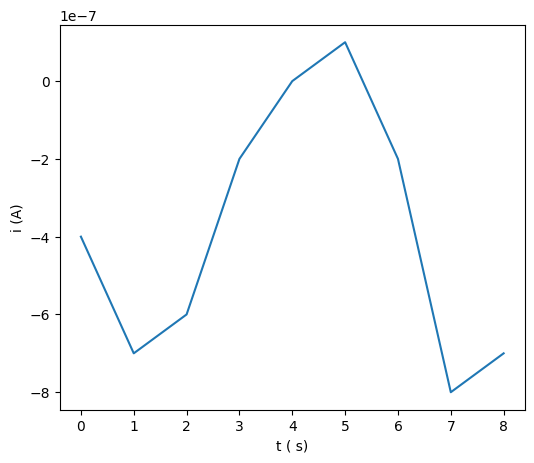

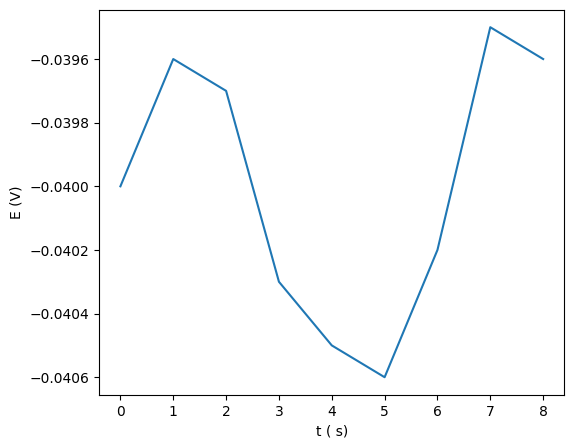

In [7]:
#data = line.split("\t")
pot.read()
stdata =pot.steps(1000,3000,500,4000,0,3000)
stdata.plot()
stdata.plot(y_channel = "E")

In [8]:
#LSV, ini = pot.ramp(500,1000,0,100,2)
#LSV, ini = pot.ramp(500,1000,0,100,1)
pot.ramp_test(500,1000,0,100,2)
#LSV, ini, data_lsv = pot.ramp(500,1000,0,100,2)


b'ramp 500 1000 0 100 2\n'
@Ramp	500	1000	0	100	2	Duration(ms)	20000
DELAYED RAMP for 0
START RAMP
	39000	-41.7	1.0E-6	011	It3029
	40000	-40.7	0.3E-6	011	It3033
	41000	-41.1	0.7E-6	011	It3031
	42000	-40.5	0.2E-6	011	It3032
	43000	-40.4	0.1E-6	011	It3033
Ramp n.#1
	44000	-41.0	0.6E-6	011	It3021
	45000	-41.6	1.1E-6	011	It3003
	46000	-41.8	1.2E-6	011	It3004
	47000	-42.6	1.7E-6	011	It3000
	48000	-40.6	0.3E-6	011	It3009
	49000	-40.5	0.2E-6	011	It3010
	50000	-41.6	1.0E-6	011	It3015
	51000	-40.8	0.5E-6	011	It3021
	52000	-40.1	-0.1E-6	011	It3022
	53000	-40.4	0.1E-6	011	It3023
Ramp p.#2
	54000	-40.2	-0.0E-6	011	It3031
	55000	-40.2	-0.1E-6	011	It3045
	56000	-40.1	-0.1E-6	011	It3046
	57000	-40.2	-0.0E-6	011	It3045
	58000	-40.5	0.2E-6	011	It3044
DONE RAMP


In [9]:
datas_lsv = pot.ramp2(0.50,1.000,0,0.050,2)

b'ramp 500 1000 0 50 2\n'
INI: xx indexData 0
START
---------LEN 9 0.5 1.0 0.05
zero_crossings [1 2 5 6]


In [10]:
data_lsv.plot()

NameError: name 'data_lsv' is not defined

In [ ]:
data_lsv[0].plot()
data_lsv[1].plot()

In [23]:
pot.read()

'\t81000\t-39.8\t-0.3E-6\t011\tIt3023'

In [24]:
pot.close()

In [ ]:
aa =b'CELL 1 - E\r\n'
print(aa[0:4] == b"CELL")

In [ ]:
a=LSV[0][:,0]
print(a)
plt.plot(LSV[0][:,0], LSV[0][:,2])
plt.show()

In [14]:
ab = EC_Data()
ab.Time= LSV[0][:,0]
ab.E= LSV[0][:,1]
ab.i= LSV[0][:,2]

In [ ]:
ab.plot(x_channel="E",y_channel="i")